In [4]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

# parameters
training_epochs = 15
batch_size = 100

In [5]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [6]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, # 어떤 데이터?
                                          batch_size=batch_size, # 몇개씩?
                                          shuffle=True, # 순서 섞어서?
                                          drop_last=True)

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)


for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device) # 28x28 image를 784개의 데이터로 변환
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.534023643
Epoch: 0002 cost = 0.358725101
Epoch: 0003 cost = 0.330888599
Epoch: 0004 cost = 0.316034973
Epoch: 0005 cost = 0.307000637
Epoch: 0006 cost = 0.299992740
Epoch: 0007 cost = 0.294816524
Epoch: 0008 cost = 0.290661335
Epoch: 0009 cost = 0.287438482
Epoch: 0010 cost = 0.284535021
Epoch: 0011 cost = 0.281600177
Epoch: 0012 cost = 0.279538035
Epoch: 0013 cost = 0.277506322
Epoch: 0014 cost = 0.275836676
Epoch: 0015 cost = 0.274329692
Learning finished


Accuracy: 0.8852999806404114
Label:  9
Prediction:  9


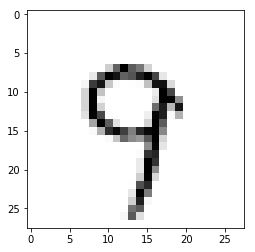

In [17]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()